In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [7]:
df.drop("CustomerID",axis=1,inplace=True)

In [8]:
cat=df.select_dtypes(include=["object"]).columns
num=df.select_dtypes(exclude=["object"]).columns
preprocess=ColumnTransformer([("cat",OneHotEncoder(),cat),("num",StandardScaler(),num)])
pipe=Pipeline([("pre",preprocess),("pca",PCA(n_components=2))])

In [9]:
pipe

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['Gender'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object'))])),
                ('pca', PCA(n_components=2))])

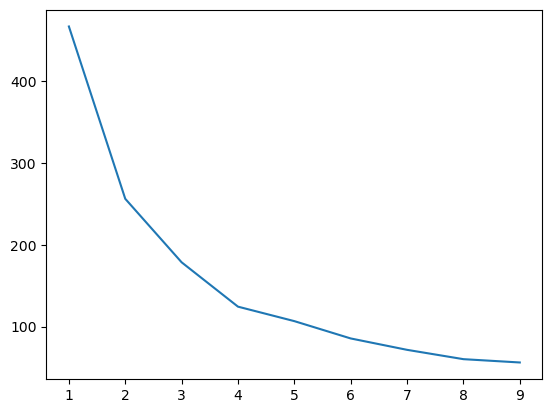

In [11]:
X_transformed = pipe.fit_transform(df) 
range_values=range(1,10)
inertia=[]
for i in range_values:
    k=KMeans(n_clusters=i,init='k-means++')
    k.fit(X_transformed)  
    inertia.append(k.inertia_)
sns.lineplot(y=inertia,x=range_values)
plt.show()

In [12]:
kmean=KMeans(n_clusters=4)

In [13]:
kmean.fit(X_transformed)

KMeans(n_clusters=4)

In [14]:
X_df = pd.DataFrame(X_transformed,columns=["x","y"])

In [15]:
X_df["clusters"]=kmean.predict(X_transformed)
X_df

,x,y,clusters
0,-0.575724,-1.684874,2
1,-1.623595,-1.726481,2
2,0.279614,-1.725314,0
3,-1.511064,-1.796205,2
4,-0.095468,-1.707347,2
...,...,...,...
195,-1.114233,2.173308,3
196,0.778106,2.470016,1
197,-1.041613,2.517265,3
198,0.474021,2.994849,1


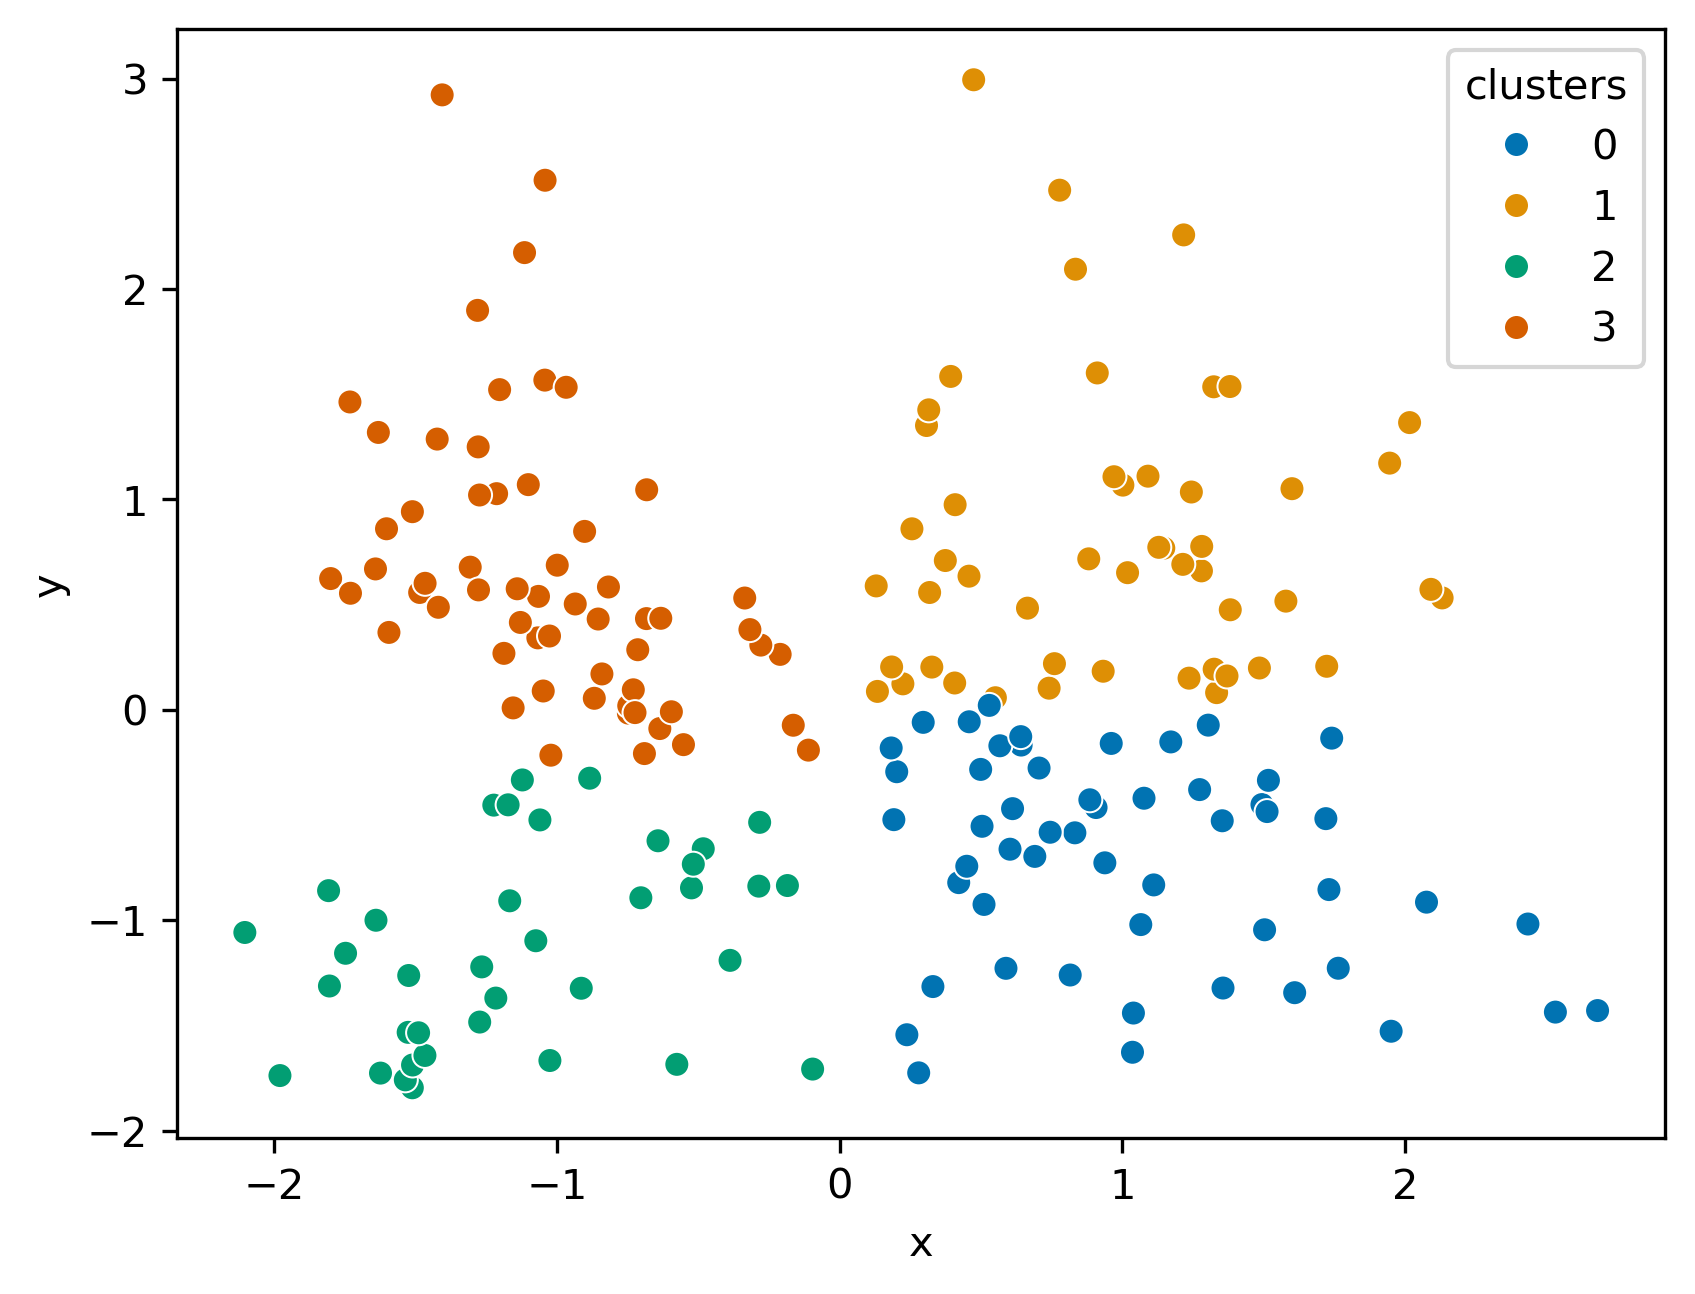

In [16]:
fig=plt.figure(dpi=300)
sns.scatterplot(X_df,x="x",y="y",hue="clusters",palette="colorblind")
plt.show()

In [17]:
dbscan=DBSCAN(eps=0.4,min_samples=5,leaf_size=100)
X_df["DBSCAN"]=dbscan.fit_predict(X_transformed)

In [18]:
X_df

,x,y,clusters,DBSCAN
0,-0.575724,-1.684874,2,-1
1,-1.623595,-1.726481,2,0
2,0.279614,-1.725314,0,-1
3,-1.511064,-1.796205,2,0
4,-0.095468,-1.707347,2,-1
...,...,...,...,...
195,-1.114233,2.173308,3,-1
196,0.778106,2.470016,1,-1
197,-1.041613,2.517265,3,-1
198,0.474021,2.994849,1,-1


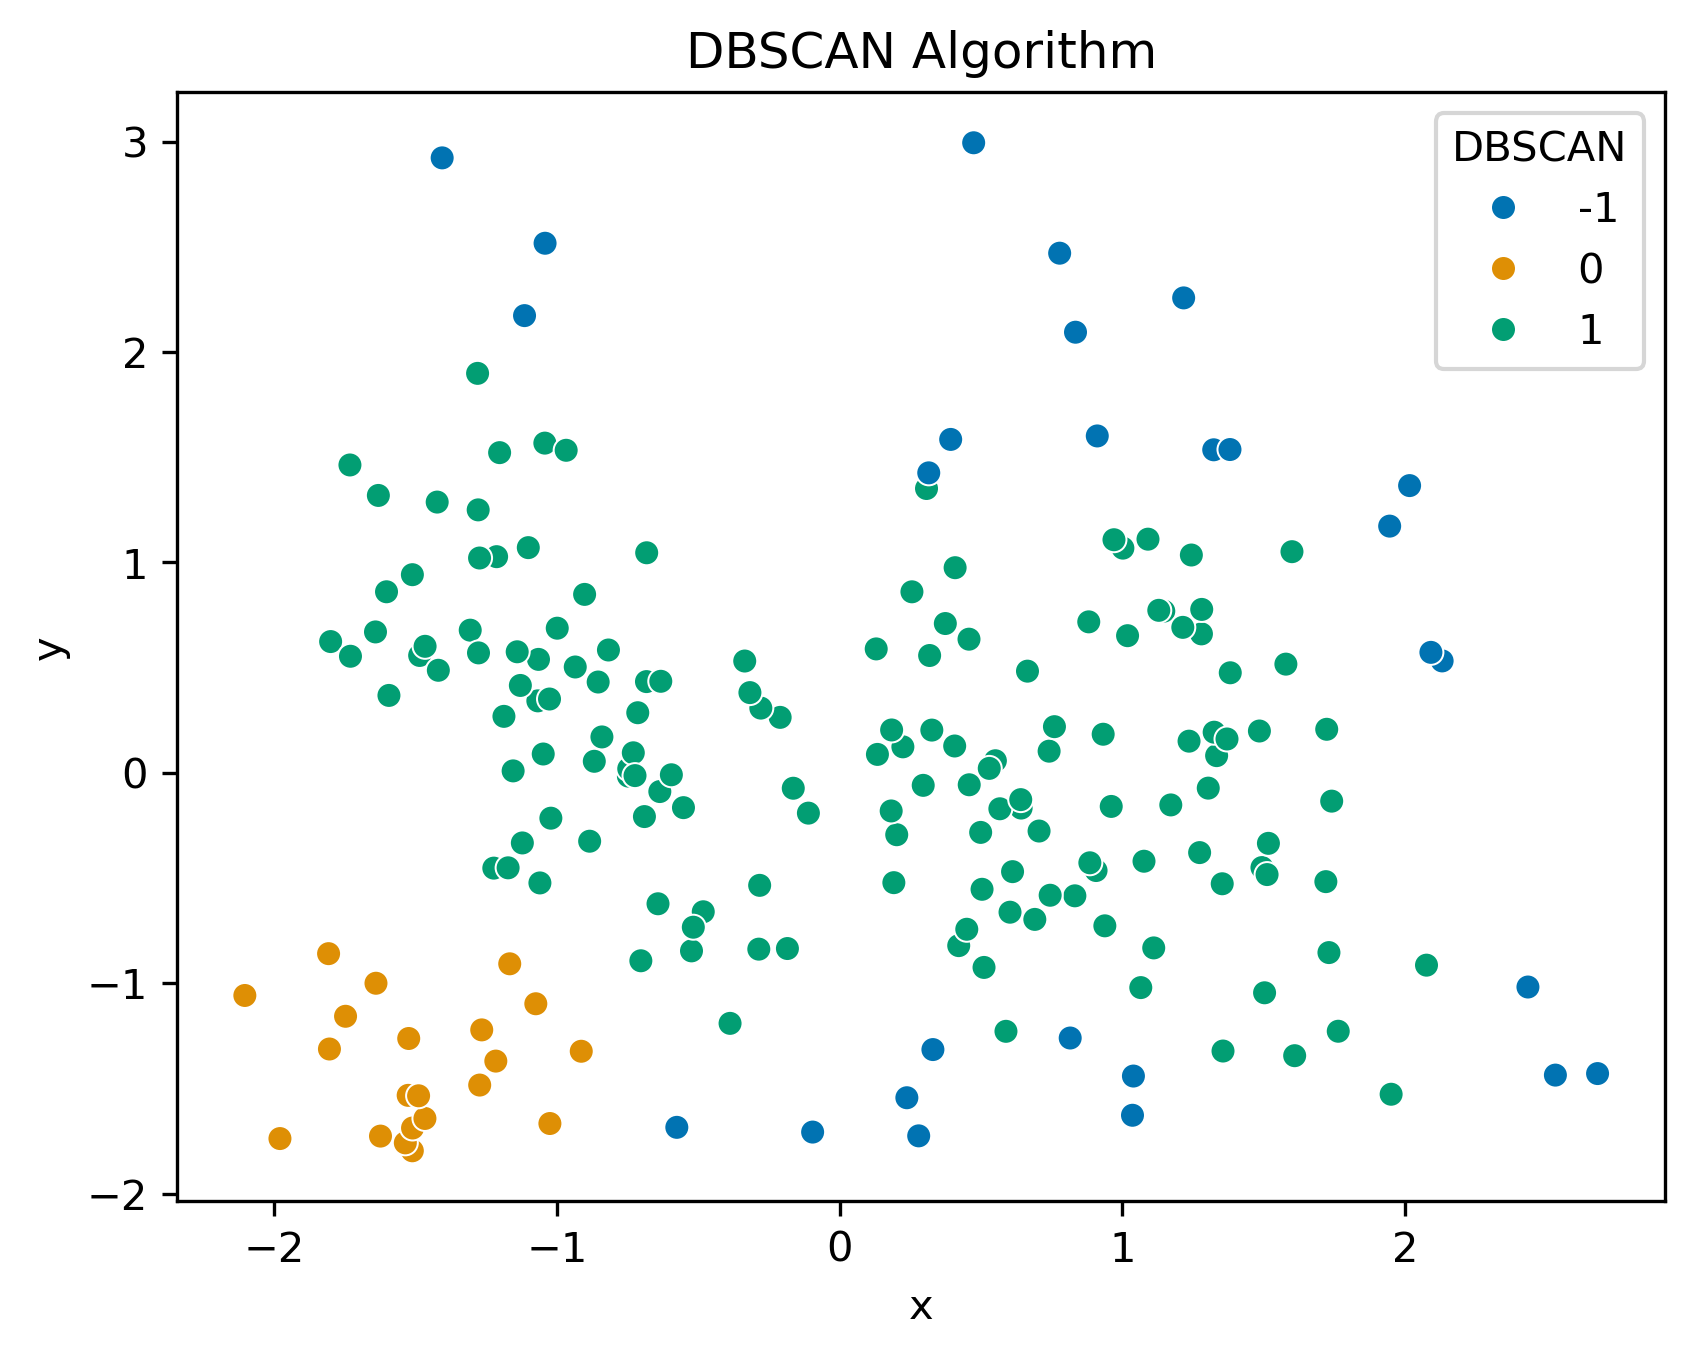

In [19]:
fig=plt.figure(dpi=300)
sns.scatterplot(X_df,x="x",y="y",hue="DBSCAN",palette="colorblind")
plt.title("DBSCAN Algorithm")
plt.show()

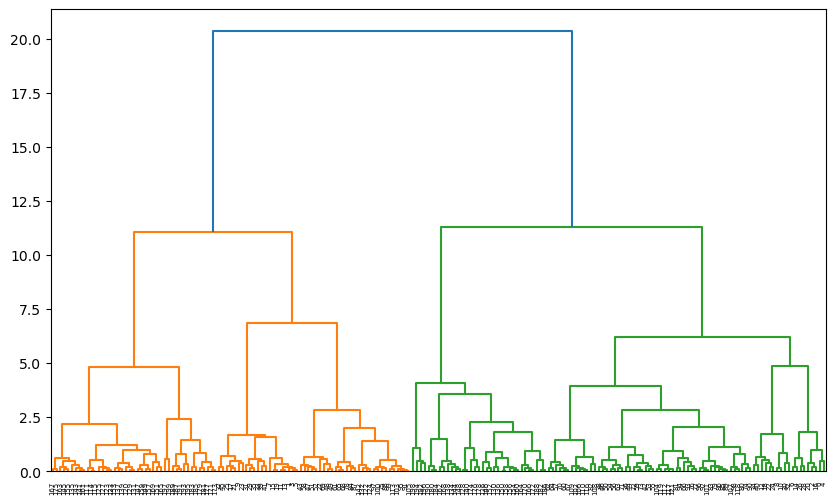

In [20]:
linked = linkage(X_transformed, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.show()

In [21]:
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
X_df["Agglomerative"] = agg_cluster.fit_predict(X_transformed)
X_df.head()

,x,y,clusters,DBSCAN,Agglomerative
0,-0.575724,-1.684874,2,-1,0
1,-1.623595,-1.726481,2,0,1
2,0.279614,-1.725314,0,-1,0
3,-1.511064,-1.796205,2,0,1
4,-0.095468,-1.707347,2,-1,0


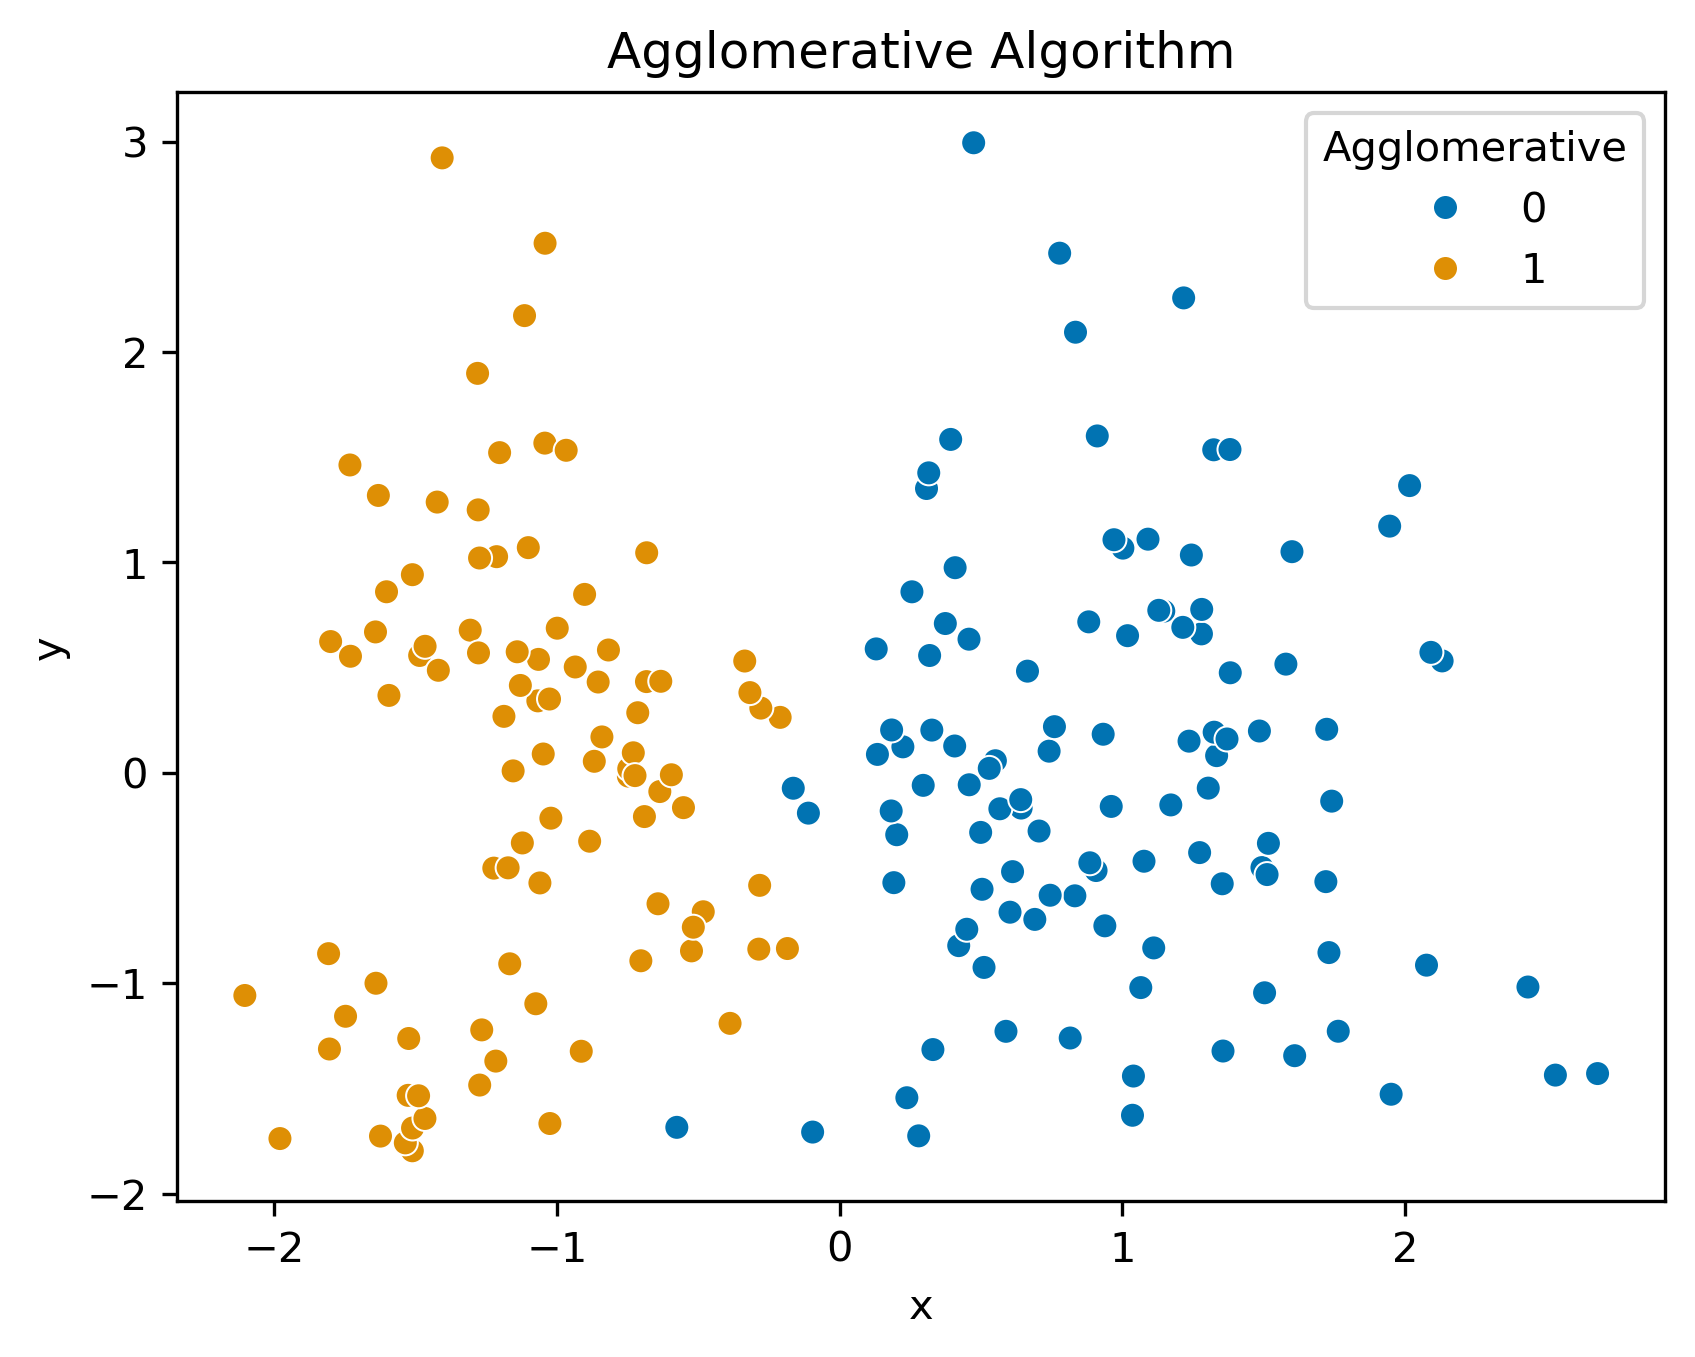

In [22]:
fig=plt.figure(dpi=300)
sns.scatterplot(X_df,x="x",y="y",hue="Agglomerative",palette="colorblind")
plt.title("Agglomerative Algorithm")
plt.show()